### 통계학이란? 

    통계학
    수치 데이터의 수집, 분석, 해석, 표현 등을 다루는 수학의 한 분야로 크게 기술 통계학과 추론 통계학으로 분류됨 

    기술 통계학: 연속형 데이터 -> 평균, 표준편차와 같은 자료 요약
                 범주형 데이터 -> 빈도, 백분율과 같은 자료 요약
    추론 통계학: 표본이라 불리는 일부 자료를 수집해 전체 모집합에 대한 결론을 유추
    추론은 가설 검정, 수치의 특징 계산, 데이터 간의 상관관계 등을 통해 이루어짐

    데이터에 통계학을 적용해 변수의 유의성을 분석함으로써 데이터의 숨겨진 특징을 찾아내는 것을 통계 모델링이라고함 

### 머신러닝 이해에 필요한 통계학 핵심 개념
    통계 모델은 수학적 모델 -> 변수들로 이루어진 수학식을 계산해 실제 값을 추정하는 방법
    통계 모델을 이루는 여러 가정은 확률 분포를 따름
    통계 모델은 모든 변수가 만족해야 하는 기본 가정으로 시작하며, 이 조건이 만족할 떄만 모델의 성능이 통계적으로 의미를 가짐

#### 모집단과 표본

    모집단: 모든 관측값 또는 분석 대상의 전체 데이터를 의미
    표본: 모집단의 부분 집합으로, 분석 대상 중인 전체 데이터의 일부분

***모집단 대상이냐 표본 대상이냐에 따라 통계 모델링 기법이 달라짐 

#### 모수와 통계량 

    모수: 모집단의 특징을 나타내는 수치값
    통계량: 표본의 특징을 나타내는 수치값으로, 모수 추정을 위해 사용
        평균, 중앙값, 최빈값, 분산 등과 같은 데이터를 대표하는 값
        
    정규분포는 좌우가 균등하므로, 평균, 중앙값, 최빈값이 모두 중앙에 위치함 
    좌우로 치우친 경우 세 개의 값의 위치가 다름 
    평균, 중앙값, 최빈값에 따라 데이터의 분포를 유추할 수 있음 

***통계량이 실제 모집단을 대표하는 값이 될 때 통계적 유의성을 확보할 수 있음 

In [6]:
import numpy as np
from scipy import stats

np.random.seed(0)

data = np.random.randint(0, 100, 10000)

type(data)
mean = np.mean(data); print("평균값: ", mean.round(2))
median = np.median(data); print("중앙값: ", median)
mode = stats.mode(data); print('최빈값: {}({})'.format(mode[0][0], mode[1][0])) 
# mode[0][0] :mode ,  mode[1][0] : count 
# numpy 는 최빈값과 관련된 함수는 제공하지 않으므로, scipy 패키지의 status 모듈에 있는 mode 함수 사용

평균값:  49.17
중앙값:  49.0
최빈값: 3(125)


In [7]:
mode

ModeResult(mode=array([3]), count=array([125]))

#### 분산, 표준편차, 범위, 사분위수

    통계에서 가장 중요한 개념: 변량 

    변량의 측정: 산포는 데이터의 변량을 의미하며, 데이터가 얼마나 중심으로 모이지 않고 흩어져 있는지를 설명

    분산: 평균과의 거리를 제곱한 값의 평균

    표준편차: 분산의 제곱근 (합리적인 크기로 작아져 중요한 개념이 됨) 

    범위: 최대값과 최소값의 차이

    사분위수: 데이터를 4등분한 값. 25% 값을 1사분위수(Q1), 50% 값을 2사분위수(Q2), 75% 값을 3사분위수(Q3)
    
    IQR: Interquartile Range. Q1과 Q3의 차이 
    IQR은 이상치를 판별하여 통계 결과의 신뢰성을 높이므로 꼭 필요함 !!

In [9]:
from statistics import variance, stdev # 분산, 표준편차 
import numpy as np

np.random.seed(0)
points = np.random.randint(0, 100, 20) # 0부터 100까지의 20개의 데이터를 가져온다 
var = variance(points); print("분산: ", var)
std = stdev(points); print("표준편차: ", np.round(std, 2)) # 소수 셋째 자리에서 반올림
range = np.max(points) - np.min(points); print("범위: ", range)
print("사분위수:")
for val in [0,25,50,75,100]:
    quantile = np.percentile(points, val) # 분위수를 구하는 함수: percentile
    print("{}% => {}".format(val, quantile))

q1, q3 = np.percentile(data, [25, 75])
print("IQR: ",q3 - q1)


분산:  662
표준편차:  25.73
범위:  79
사분위수:
0% => 9.0
25% => 42.75
50% => 64.5
75% => 84.0
100% => 88.0
IQR:  49.0


#### 가설 검정과 P-value

    대립가설(연구가설, alternaltive hypersis, h1): 연구를 할 때 세우는 가설을 의미함
    귀무가설: 통계적으로 의미가 있다는 것을 의미할 때 사용 
    가설 검정:

    - 표본에 대한 통계적 테스트를 수행해 전체 모집단에 대한 추론을 만드는 과정으로, 귀무 가설과 대립가설을 통해 가정이 통계적으로 의미가 있는 검정함 

    - 모델링에서 각 독립변수에 대해 0.05보다 작은 p-value 는 유의미하다고 간주함 

#### 가설 검정의 단계

    귀무가설 정의
    표본 추출 
    검정통계량에 따른 귀무가설의 통계적 유의성 확인 (기준이 되는 값=p-value/ 0.05 미만이면 기각, 이상이면 채택)
    검정통계량에 따라 귀무가설 채택 또는 기각 

    p-value: 귀무가설이 옳다는 전제 하에 표본에서 실제로 관측된 통계값과 같거나 더 극단적인 통계값이 관측될 확률
    
    한 빵집에서 생산되는 식빵의 무게가 최소 200g이라고 주장할 경우, 표본 20개를 추출해 구한 평균 무게가 196g이고, 표준편차는 5.3g이었다면, 유의수준 5%(0.05)로 위의 주장을 기각할 수 있을까? 

    귀무가설 : 모든 식빵의 무게는 200g 이상이다.
    * 귀무가설을 기각하려면 p-value가 0.05보다 작아야 한다 

    표본 : x바(표본의 평균)=196, s(표본의 표준편차)=5.3 , n(표본크기)=20

In [13]:
import numpy as np
from scipy import stats

x_bar, mu, s, n = 196, 200, 5.3, 20

# 단일 표본 t 검정 
t_sample = (x_bar - mu) / (s / np.sqrt(float(n)))
print("검정통계량: ",np.round(t_sample, 2))

alpha = 0.05 # 유의수준 
t_alpha = stats.t.ppf(alpha, n-1)
print("t-table로부터의 임계값: ",np.round(t_alpha, 3))

p_value = stats.t.sf(np.abs(t_sample), n-1) # abs 절대값 
print("t-table의 아래쪽 꼬리 p 값: ",np.round(p_value, 4))

# p-value 는 t값 까지의 면적을 의미 

검정통계량:  -3.38
t-table로부터의 임계값:  -1.729
t-table의 아래쪽 꼬리 p 값:  0.0016


In [14]:
# p-value 값이 0.05 보다 작으므로 귀무가설 기각 = 당신이 주장하는 것은 통계적으로 유의미하지 않다. 

#### 정규분포

    정규분포:
    - 중심 극한 정리에 따르면 평균이 뮤이고 분산이 시그마 제곱(표준편차가 시그마)인 모집단으로부터 가능한 모든 n개의 조합을 표본으로 추출하면 표본의 평균은 정규 분포에 접근함 (확률밀도함수)

    시험 점수가 정규분포를 따른다고 가정할 경우, 평균 점수가 56점이고 표준편차가 13.6인 경우, 75점 이상을 받은 학생들은 몇 %일까? 
    -> 정규분포를 따르므로 표준정규분포로 바꿔 계산(0,1)

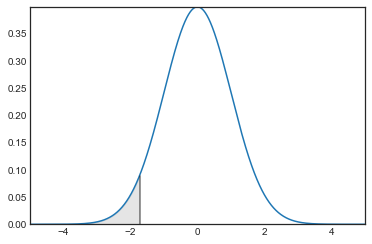

In [15]:
import matplotlib.pyplot as plt


# In[8]:


get_ipython().run_line_magic('matplotlib', 'inline')


# In[9]:


plt.style.use("seaborn-white")


# In[10]:


mu, std = 0, 1
rv = stats.norm(mu, std)


# In[11]:


x = np.linspace(-5, 5, 1000)
d = rv.pdf(x)


# In[12]:


ax = plt.axes()
ax.plot(x, d)

ax.fill_between(x, d, where=x <= t_alpha, color=(0, 0, 0, 0.1))
y = rv.pdf(t_alpha)
ax.plot([t_alpha, t_alpha], [0, y], color=(0, 0, 0, 0.5))
ax.margins(0, 0)

In [16]:
x, mu, sigma = 75, 56, 13.6

z = (x - mu) / sigma
print("z-score: ", np.round(z, 2))

p_value = 1 - stats.norm.cdf(z) # cdf 누적확률분포함수 
print("학생이 {}점 이상 받을 확률: {}%".format(x,np.round(p_value*100,2)))

z-score:  1.4
학생이 75점 이상 받을 확률: 8.12%


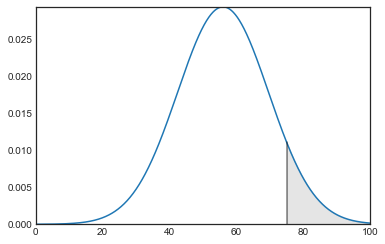

In [17]:
np.round(p_value * 100, 2)


# In[17]:


rv = stats.norm(mu, sigma)


# In[23]:


xp = np.linspace(0, 100, 1000)
d = rv.pdf(xp)


# In[25]:


ax = plt.axes()
ax.plot(xp, d)

ax.fill_between(xp, d, where=xp >= x, color=(0, 0, 0, 0.1))
y = rv.pdf(x)
ax.plot([x, x], [0, y], color=(0, 0, 0, 0.5))
ax.margins(0, 0)

#### 카이제곱 독립성 검정

    카이제곱 검정은 독립성 검정을 하는 검정 기법 

    카이제곱 독립성 검정:
    범주형 데이터의 통계 분석에 가장 보편적으로 사용되는 검정으로, 2개의 범주형 변수 사이에 통계적 상관성이 존재하는지를 판단함

    흡연이 운동에 영향을 미칠까? 

In [19]:
import numpy as np 
import pandas as pd
from scipy import stats

# 독립성 검정을 위한 데이터 

np.random.seed(0)

smoke=["안함","가끔","매일","심함"]
exercise=["안함",'가끔','매일']

data = {"smoke": np.random.choice(smoke, size=500), "exercise":np.random.choice(exercise, size=500)}
df = pd.DataFrame(data, columns=["smoke","exercise"])
df.head()

,smoke,exercise
0,안함,안함
1,심함,안함
2,가끔,매일
3,안함,가끔
4,심함,가끔


In [20]:
# pandas 함수를 이용해 독립성 검정 분할표 만들기
# 2개의 범주형 변수가 독립이냐 상관관계냐를 파악하려고 할 때 카이제곱 분포를 사용 

xtab = pd.crosstab(df.smoke, df.exercise)
xtab

exercise,가끔,매일,안함
smoke,,,
가끔,38,39,45
매일,34,44,33
심함,45,44,51
안함,47,41,39


In [21]:
contg = stats.chi2_contingency(observed=xtab) # chi2_contingency : 2개의 범주형 변수가 독립이냐 상관관계냐를 파악
p_val = np.round(contg[1],3)
print("p-값: ",p_val) # 흡연 습관과는 운동과 상관관계가 없다. 

p-value:  0.668


In [22]:
contg # ch2, p-value, dof, expected

(4.064739553068125, 0.667915629272182, 6, array([[40.016, 40.992, 40.992],
        [36.408, 37.296, 37.296],
        [45.92 , 47.04 , 47.04 ],
        [41.656, 42.672, 42.672]]))

#### ANOVA 분산 분석

    ANOVA 분산 분석
    - Analysis of variance
    - 모집단이 셋 이상인 경우, 이들의 평균이 서로 동일한지 테스트함
    - 귀무가설: 모든 모집단의 평균에 차이가 없다
    - 대립가설: 적어도 하나의 모집단의 평균에 차이가 있다

    10명의 환자를 대상으로 A,B,C 세 가지 수면제 약효(수면시간)를 각각 테스트할 경우, 유의수준 0.05 에서 A,B,C 수면제의 평균 수면시간은 동일한가? 

#### T-검정은 두 집단의 평균 차이, ANOVA는 셋 이상의 평균 차이 검정

In [24]:
np.random.seed(0)

data =(np.random.rand(30).round(2)*10).reshape(-1,3) # rand 0에서 1사이의 값 중 30개
df = pd.DataFrame(data=data, columns=["A","B","C"])
df

# "A","B","C" 의 약을 먹었을 때 수면시간을 의미 

,A,B,C
0,5.5,7.2,6.0
1,5.4,4.2,6.5
2,4.4,8.9,9.6
3,3.8,7.9,5.3
4,5.7,9.3,0.7
5,0.9,0.2,8.3
6,7.8,8.7,9.8
7,8.0,4.6,7.8
8,1.2,6.4,1.4
9,9.4,5.2,4.1


In [26]:
one_way_anova = stats.f_oneway(df.A, df.B, df.C) 
# 한개의 범주형 변수를 사용하는 방법 = 일원 분산분석
print("통계량: {}, p-value: {}".format(np.round(one_way_anova[0],2),
                                    np.round(one_way_anova[1],3)))

# 분산분석은 f분포를 따르는 f통계량 사용, ANOVA (F 검정)
# 한개의 범주형 변수를 사용하는 두 개 이상의 범주형 변수를 사용하는 이렇게 두가지 방식이 있다 

통계량: 0.34, p-value: 0.713


In [27]:
one_way_anova

F_onewayResult(statistic=0.3419183875936612, pvalue=0.7134376700130741)

In [ ]:
# 귀무가설(세 개의 수면제 약효 평균이 동일하다) 채택. 0.05 보다 크므로 !

## 주요 정리 

    1. 귀무가설과 대립가설을 통해 가정이 통계적으로 의미가 있는 검정하는 절차를 가설 검정이라고 한다.

    2. 가설검정은 귀무가설을 정의하고, 표본을 추출하고, 검정 통계량에 따른 통계적 유의성을 확인 후 귀무가설을 채택하거나 기각하는 순으로 절차를 진행한다. 

    3. p-value 는 귀무가설이 옳다는 전제 하에 표본에서 실제로 관측된 통계값과 같거나 더 극단적인 통계값이 관측될 확률이다. 

    4. 평균이 뮤이고 분산이 시그마 제곱인 모집단으로부터 가능한 모든 n 개의 조합을 표본으로 추출하면 표본의 평균은 정규 분포에 접근한다. 

    5. 카이제곱 검정은 범주형 데이터의 통계 분석에 사용되는 검정으로, 2개의 범주형 변수 사이에 독립성을 판단한다. 

    6. ANOVA 분산분석은 모집단이 셋 이상인 경우, 이들의 평균이 서로 동일한지 테스트 한다. 